In [161]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [162]:
#Transform pipeline
transform = transforms.Compose([
    transforms.ToTensor(), # 0-255 => (0,1]
    transforms.Normalize((0.5,),(0.5,)) # [0,1) =>[-1, 1]
])

# using pipeline
train_dataset = datasets.MNIST(
                root = "data",
                download = True,
                train = True,
                transform = transform
)
test_dataset = datasets.MNIST(
                root = "data",
                download = True,
                train = False,
                transform = transform
)

In [163]:
len(train_dataset)

60000

In [164]:
len(test_dataset)

10000

In [165]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle = True)

data_iter = iter(train_loader)
images , labels = next(data_iter)

In [166]:
image.shape

torch.Size([64, 1, 28, 28])

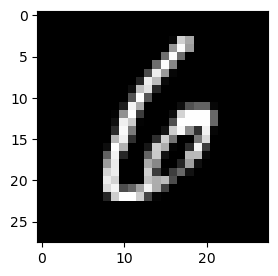

In [167]:
# plating image
plt.figure(figsize=(3,3))
plt.imshow(images[0].squeeze(), cmap = "gray")
plt.show()

In [168]:
# showing plotted image
labels[0]

tensor(6)

In [173]:
# Definging neural network class 
class DigitsClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(),  # ekk long line mai flat the matrix
            nn.Linear(784, 128),  # input layer is 784, and innner layer are 128
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
        )
    def forward(self, x):
        return self.network(x)

In [175]:
model = DigitsClassifier()
optimizer = optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

In [185]:
epochs = 5

for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        # 1. Forword pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        running_loss += loss.item()  # loss is a tensor and .item() with loss give you first value of item
        # 2. Backword pass
        optimizer.zero_grad()
        loss.backward()

        
        # 3. weight update
        optimizer.step() # w_new = w_old - n* d(loss) / dw

    print(f"Epoch [{epoch+1}/{epochs}], loss: {running_loss / len(train_loader): .2f}")

Epoch [1/5], loss:  0.08
Epoch [2/5], loss:  0.07
Epoch [3/5], loss:  0.06
Epoch [4/5], loss:  0.06
Epoch [5/5], loss:  0.05


In [ ]:
# training the model
model.eval() # # Switch to evaluation mode

total = 0
correct = 0
with torch.no_grad():
    for images , labels in test_loader:
        outputs = model(images) # forword pass
        _, predicted = torch.max(outputs.data, 1)  # Har image ke liye sabse bada score wala class index nikalta hai.
        print(predicted)
        print(labels)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
        #print((predicted == labels).sum().item())
        #print(outputs[0])
        #print(labels[0])
        break

print(f'Accuracy on test set is : {100 * correct/total: .2f} % ')

tensor([5, 9, 1, 8, 6, 3, 0, 0, 3, 5, 4, 8, 0, 3, 7, 2, 2, 6, 4, 5, 7, 1, 6, 4,
        4, 2, 7, 6, 4, 9, 1, 8, 7, 0, 7, 6, 4, 9, 5, 9, 9, 8, 8, 1, 8, 1, 1, 4,
        7, 5, 7, 9, 9, 4, 8, 4, 3, 1, 8, 1, 3, 5, 8, 8])
tensor([5, 9, 1, 8, 6, 3, 0, 0, 3, 5, 4, 8, 0, 3, 7, 2, 2, 6, 4, 5, 7, 1, 6, 4,
        9, 2, 7, 6, 4, 9, 1, 8, 7, 0, 7, 6, 4, 9, 5, 9, 9, 8, 8, 1, 8, 1, 1, 4,
        7, 5, 7, 9, 9, 4, 8, 4, 3, 1, 8, 1, 3, 5, 8, 8])
Accuracy on test set is :  98.44 % 


In [208]:
total , correct

(64, 63)